<a href="https://colab.research.google.com/github/archimehta/learning-pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Convert MNIST image files into tensor of 4-dimensions
# (# of images, height, width, color channel)

transform = transforms.ToTensor()

In [4]:
# Train data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 19.4MB/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 530kB/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.83MB/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.65MB/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [5]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
pwd

'/content'

In [9]:
ls

sample_data/


In [10]:
cd ../

/


In [11]:
pwd

'/'

In [12]:
ls

bin@                        datalab/  lib32@   NGC-DL-CONTAINER-LICENSE  root/  tmp/
boot/                       dev/      lib64@   opt/                      run/   tools/
cnn_data/                   etc/      libx32@  proc/                     sbin@  usr/
content/                    home/     media/   python-apt/               srv/   var/
cuda-keyring_1.0-1_all.deb  lib@      mnt/     python-apt.tar.xz*        sys/


In [13]:
cd cnn_data

/cnn_data


In [14]:
ls

MNIST/


In [15]:
cd ../

/


In [16]:
cd content/|

[Errno 2] No such file or directory: 'content/|'
/


In [17]:
cd content/

/content


In [18]:
# Create a small batch size for images.. let's say 10
train_loader = DataLoader(train_data, batch_size = 10, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle=False)

In [19]:
# Define our CNN Model
# Describe convolutional layer and what it is doing
# 2 convolutional layers, just as an example
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [21]:
# Grab 1 MNIST record/image
for i, (X_train, y_train) in enumerate(train_data):
  break

In [22]:
X_train.shape

torch.Size([1, 28, 28])

In [23]:
x = X_train.view(1,1,28,28)

In [24]:
# Perform our first convolution
x = F.relu(conv1(x)) # Rectified linear unit for our activation function

In [25]:
x

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1942, 0.1942, 0.1942,  ..., 0.1942, 0.1942, 0.1942],
          [0.1942, 0.1942, 0.1942,  ..., 0.1942, 0.1942, 0.1942],
          [0.1942, 0.1942, 0.1942,  ..., 0.1942, 0.1942, 0.1942],
          ...,
          [0.1942, 0.1942, 0.3369,  ..., 0.1942, 0.1942, 0.1942],
          [0.1942, 0.1942, 0.2139,  ..., 0.1942, 0.1942, 0.1942],
          [0.1942, 0.1942, 0.1942,  ..., 0.1942, 0.1942, 0.1942]],

         [[0.2251, 0.2251, 0.2251,  ..., 0.2251, 0.2251, 0.2251],
          [0.2251, 0.2251, 0.2251,  ..., 0.2251, 0.2251, 0.2251],
          [0.2251, 0.2251, 0.2251,  ..., 0

In [28]:
# 1 image
# 6 is the filters we asked for
# 26 x 26 are the pixels of the image b/c 2 pixels are being dropped
# since we did not do any padding
x.shape

torch.Size([1, 6, 26, 26])

In [31]:
# Pass through the pooling layer
x = F.max_pool2d(x,2,2) # kernal of 2 and stride of 2

In [33]:
# 1 image
# 6 filters
# when you pool, you lose some information
# 26 / 2 = 13
x.shape

torch.Size([1, 6, 13, 13])

In [34]:
# Second convolutional layer
x = F.relu(conv2(x))

In [36]:
# 1 image
# 16 filters
# losing 2 pixels on the outside due to lack of padding
x.shape

torch.Size([1, 16, 11, 11])

In [37]:
# Pooling layer
x = F.max_pool2d(x,2,2)

In [39]:
# 11 / 2 = 5.5, but we can't invent data to round up
# so we have to round down
x.shape

torch.Size([1, 16, 5, 5])

In [42]:
# Model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    # input, output, kernel, stride length
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # fully connected layer
    # 5*5*16 derived from previous x.shape
    # 120, 84, 10 is just an arbitrary input
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  # Forward function
  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernel and stride 2

    # Second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    # Re-view to flatten it out
    X = X.view(-1, 16*5*5) # -1 so that we can vary the batch size

    # Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [43]:
# Create an instance of our model
torch.manual_seed(41)
model = ConvolutionalNetwork()

In [44]:
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [45]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # smaller learning
# rate means longer to train

In [50]:
import time
start_time = time.time()

# create variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


# For loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  #Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 #start our batches at 1
    # Apply our model
    y_pred = model(X_train) # get predicted values from training set, not flat 2D
    loss = criterion(y_pred, y_train) # how off are we compare prediction to correct answers

    predicted = torch.max(y_pred.data,1)[1] # add up number of correct predictions
    batch_corr = (predicted == y_train).sum() # how many we get cofrect from this batch. True = 1, false = 0, and sum
    trn_corr+=batch_corr # keep track as we go along training


    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print our result
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  #Test
  with torch.no_grad(): #no gradient so we dont update weights and biases of test data
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1] # adding up correct predictions
      tst_corr+=(predicted == y_test).sum().item() # T=1 F=0 and sum

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0 Batch: 600 Loss: 0.0035396236926317215
Epoch: 0 Batch: 1200 Loss: 0.0015330926980823278
Epoch: 0 Batch: 1800 Loss: 0.14382432401180267
Epoch: 0 Batch: 2400 Loss: 0.07336147129535675
Epoch: 0 Batch: 3000 Loss: 0.02528122439980507
Epoch: 0 Batch: 3600 Loss: 0.00024326160200871527
Epoch: 0 Batch: 4200 Loss: 5.709638207918033e-05
Epoch: 0 Batch: 4800 Loss: 0.0001502757950220257
Epoch: 0 Batch: 5400 Loss: 0.009110730141401291
Epoch: 0 Batch: 6000 Loss: 0.001593995257280767
Epoch: 1 Batch: 600 Loss: 0.022227201610803604
Epoch: 1 Batch: 1200 Loss: 0.0029449646826833487
Epoch: 1 Batch: 1800 Loss: 7.33505585230887e-05
Epoch: 1 Batch: 2400 Loss: 0.001956446561962366
Epoch: 1 Batch: 3000 Loss: 0.23336124420166016
Epoch: 1 Batch: 3600 Loss: 0.0008452227339148521
Epoch: 1 Batch: 4200 Loss: 0.009115772321820259
Epoch: 1 Batch: 4800 Loss: 0.009255075827240944
Epoch: 1 Batch: 5400 Loss: 0.004858535248786211
Epoch: 1 Batch: 6000 Loss: 0.0023137733805924654
Epoch: 2 Batch: 600 Loss: 9.514769044

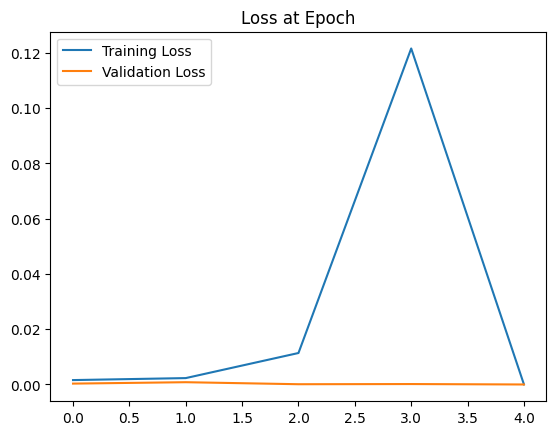

In [51]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label = "Training Loss")
plt.plot(test_losses, label = "Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

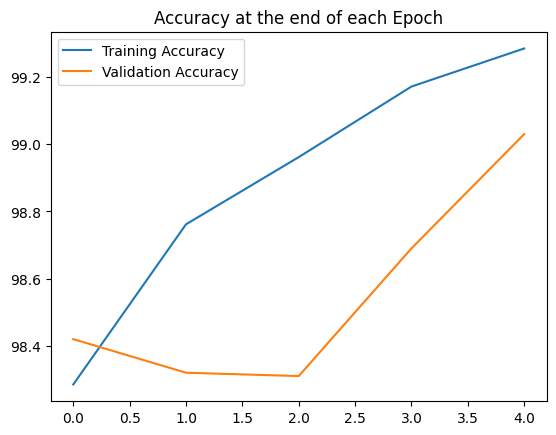

In [52]:
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label = "Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [53]:
test_load_everything = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [57]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [58]:
# Did for correct

In [59]:
correct.item()/len(test_data)*100

99.03

In [60]:
# Grab an image
test_data[4143] # gives us a tensor with an image in it
# at the end, it shows a label in it

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [62]:
# Grab just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [63]:
# reshape it
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

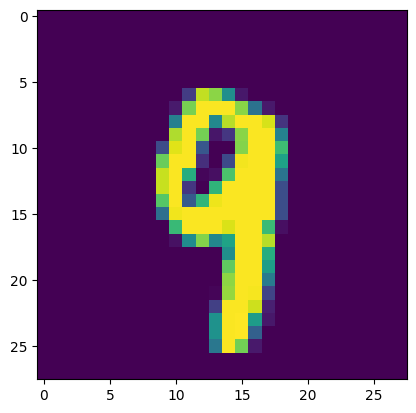

In [64]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [65]:
# pass the image through our model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28))
  # batch size of 1, 1 color channel, 28x28 image

In [66]:
# check the new prediction
new_prediction

tensor([[-2.8276e+01, -2.5546e+01, -3.2185e+01, -2.4701e+01, -1.3453e+01,
         -2.2603e+01, -3.7624e+01, -2.0614e+01, -1.9375e+01, -1.4305e-06]])

In [67]:
new_prediction.argmax()

tensor(9)